In [0]:
%load_ext autoreload
%autoreload 2

In [2]:
! wget https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/RNN_utils.py

--2019-11-07 16:05:53--  https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/RNN_utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974 (3.9K) [text/plain]
Saving to: ‘RNN_utils.py.2’

RNN_utils.py.2      100%[===================>]   3.88K  --.-KB/s    in 0s      

2019-11-07 16:05:53 (99.0 MB/s) - ‘RNN_utils.py.2’ saved [3974/3974]



In [3]:
! wget https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/federico-garcia-lorca/bodas_de_sangre.txt

--2019-11-07 16:05:55--  https://raw.githubusercontent.com/deeplearning-itba/12-RNN/master/federico-garcia-lorca/bodas_de_sangre.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69219 (68K) [text/plain]
Saving to: ‘bodas_de_sangre.txt.2’

bodas_de_sangre.txt 100%[===================>]  67.60K  --.-KB/s    in 0.02s   

2019-11-07 16:05:55 (3.25 MB/s) - ‘bodas_de_sangre.txt.2’ saved [69219/69219]



In [4]:
from RNN_utils import window_transform_text, encode_io_pairs, get_deep_rnn

Using TensorFlow backend.


# Abro archivo de texto con obra e imporimo los primeros 1000 caracteres

In [5]:
text = open('bodas_de_sangre.txt').read()
number_of_chars = len(text)
all_chars = sorted(set(text))
print('Cantidad de caracteres: ' + str(number_of_chars))
print('Cantidad de caracteres unicos: ' + str(len(all_chars)))
print(all_chars)
print('------------------------------------------------------')
print(text[:1000])

Cantidad de caracteres: 67561
Cantidad de caracteres unicos: 71
['\n', ' ', '!', '(', ')', ',', '.', '1', '2', '3', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', '¡', '¿', 'É', 'Ñ', 'á', 'é', 'í', 'ñ', 'ó', 'ú']
------------------------------------------------------
BODAS DE SANGRE(1933)

Poema trágico en tres actos y siete cuadros

Personajes
 
Madre
Criada
Leonardo
Mozos
Novia
Vecina
Novio
Leñadores
Suegra
Muchachas
Padre de la novia
Mozos
Mujer de Leonardo
Luna
Muerte (como mendiga)

Acto primero

CUADRO PRIMERO

Habitación pintada de amarillo.

NOVIO: (Entrando) Madre.

MADRE: ¿Que?

NOVIO:Me voy.

MADRE: ¿Adónde?

NOVIO:A la viña. (Va a salir)

MADRE: Espera.

NOVIO:¿Quieres algo?

MADRE: Hijo, el almuerzo.

NOVIO: Déjalo. Comeré uvas. Dame la navaja.

MADRE: ¿Para qué?

NOVI

In [6]:
chars = set(text)
len(chars)

71

# Analisis de la frecuencia de los caracteres

In [8]:
from collections import Counter
Counter(text).most_common()

[(' ', 10351),
 ('a', 5847),
 ('e', 5543),
 ('o', 4129),
 ('s', 3118),
 ('r', 2911),
 ('n', 2891),
 ('l', 2523),
 ('\n', 2423),
 ('i', 1991),
 ('u', 1984),
 ('d', 1874),
 ('t', 1623),
 ('c', 1391),
 ('.', 1369),
 ('m', 1266),
 ('A', 1033),
 (':', 888),
 ('p', 832),
 ('E', 692),
 ('O', 624),
 ('b', 599),
 ('v', 585),
 ('q', 583),
 ('D', 545),
 ('N', 539),
 ('y', 536),
 ('h', 524),
 ('R', 515),
 ('g', 498),
 (',', 465),
 ('I', 399),
 ('M', 398),
 ('V', 366),
 ('C', 351),
 ('(', 329),
 (')', 329),
 ('j', 328),
 ('L', 308),
 ('!', 282),
 ('¡', 280),
 ('í', 275),
 ('á', 252),
 ('é', 249),
 ('?', 237),
 ('¿', 235),
 ('S', 226),
 ('P', 226),
 ('U', 193),
 ('z', 186),
 ('f', 172),
 ('H', 158),
 ('ñ', 136),
 ('Q', 125),
 ('Y', 123),
 ('ó', 111),
 ('T', 109),
 ('G', 68),
 ('J', 66),
 ('1', 63),
 ('Ñ', 58),
 ('ú', 57),
 (';', 39),
 ('2', 36),
 ('B', 21),
 ('Z', 21),
 ('3', 20),
 ('F', 20),
 ('x', 11),
 ('É', 5),
 ('9', 1)]

# Veo ejemplos en train de como queda Entrada / Salida

In [0]:
import numpy as np

In [0]:
def create_dataset(text, window = 100):
  inputs = []
  outputs = []
  
  for i in range(len(text)-window):
    inputs.append(text[i:i+window])
    outputs.append(text[i+1:i+window+1])
  return inputs, outputs

In [0]:
def encode_text(inputs,chars, window_size):
    num_chars = len(chars)
    chars_to_indices = dict((c, i) for i, c in enumerate(chars))
    # cut up text into character input/output pairs
    
    # create empty vessels for one-hot encoded input/output
    X = np.zeros((len(inputs), window_size, num_chars), dtype=np.bool)
    
    # loop over inputs/outputs and tranform and store in X/y
    for i, sentence in enumerate(inputs):
        for t, char in enumerate(sentence):
            if char not in chars_to_indices:
                char = ' '
            X[i, t, chars_to_indices[char]] = 1
    return X

In [0]:
window_size = 100
X_, y_ = create_dataset(text, window_size)
X = encode_text(X_, chars, window_size)
y = encode_text(y_, chars, window_size)

In [13]:
print(X_[-1])
print('----------------')
print(y_[-1])
print('----------------')
print(text[-100:])

o
donde tiembla enmarañada
la oscura raíz del grito.
(Las vecinas, arrodilladas en el suelo, lloran.
----------------

donde tiembla enmarañada
la oscura raíz del grito.
(Las vecinas, arrodilladas en el suelo, lloran.)
----------------

donde tiembla enmarañada
la oscura raíz del grito.
(Las vecinas, arrodilladas en el suelo, lloran.)


In [14]:
X.shape, y.shape

((67461, 100, 71), (67461, 100, 71))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42, )

In [16]:
chars_to_indices = dict((c, i) for i, c in enumerate(chars))
indices_to_chars = dict((i, c) for i, c in enumerate(chars))
print(chars_to_indices)

{'x': 0, 'J': 1, '\n': 2, '¡': 3, ':': 4, 'é': 5, 'É': 6, ';': 7, 'O': 8, 'ñ': 9, 'ó': 10, 'l': 11, 'z': 12, '¿': 13, 'T': 14, 's': 15, 'N': 16, 'g': 17, 'A': 18, '2': 19, '3': 20, 'm': 21, 'Y': 22, 'D': 23, 'C': 24, 'q': 25, 'ú': 26, 'U': 27, 'h': 28, ')': 29, 'H': 30, 'S': 31, 'n': 32, ',': 33, 'Z': 34, 'd': 35, 'p': 36, 'P': 37, '.': 38, 'u': 39, 'F': 40, 'b': 41, 'v': 42, 'á': 43, 'M': 44, 'í': 45, 'V': 46, 'f': 47, 't': 48, 'o': 49, 'L': 50, 'e': 51, 'a': 52, 'i': 53, 'Q': 54, '?': 55, 'R': 56, '1': 57, 'j': 58, 'I': 59, '!': 60, '(': 61, 'c': 62, 'E': 63, 'B': 64, '9': 65, 'r': 66, 'y': 67, ' ': 68, 'G': 69, 'Ñ': 70}


In [17]:
X_train[0,0]*1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

# Defino modelo

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras.callbacks import ModelCheckpoint 
import keras
import random

In [0]:
dropout_p = 0.0
dense_units = len(chars)
input_shape = X_train.shape[1:]
LSTM_units_1=200
LSTM_units_2=200

model = Sequential()
model.add(LSTM(LSTM_units_1, input_shape=input_shape, return_sequences=True, name='lstm_1',
                       dropout=dropout_p, recurrent_dropout=dropout_p))
#model.add(LSTM(LSTM_units_2, dropout=dropout_p, recurrent_dropout=dropout_p, name='lstm_2', return_sequences=True))
model.add(Dense(dense_units, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 200)          217600    
_________________________________________________________________
dense_3 (Dense)              (None, 100, 71)           14271     
Total params: 231,871
Trainable params: 231,871
Non-trainable params: 0
_________________________________________________________________


# Primer modelo lo mas sencillo (sin dropout)

In [84]:
batch_size = 256
# plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None)
checkpointer = ModelCheckpoint(filepath='bodes_sangre_LSTM_deep_no_dropout.hdf5', verbose=1, save_best_only=True)
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=10, verbose = 1, 
                    validation_data = (X_validation, y_validation),
                    callbacks=[checkpointer])

Train on 53968 samples, validate on 13493 samples
Epoch 1/10
53968/53968 [==============================] - 54s 1ms/step - loss: 2.9399 - val_loss: 2.3692

Epoch 00001: val_loss improved from inf to 2.36921, saving model to bodes_sangre_LSTM_deep_no_dropout.hdf5
Epoch 2/10
53968/53968 [==============================] - 53s 984us/step - loss: 2.1428 - val_loss: 1.9661

Epoch 00002: val_loss improved from 2.36921 to 1.96613, saving model to bodes_sangre_LSTM_deep_no_dropout.hdf5
Epoch 3/10
53968/53968 [==============================] - 53s 981us/step - loss: 1.8679 - val_loss: 1.7860

Epoch 00003: val_loss improved from 1.96613 to 1.78599, saving model to bodes_sangre_LSTM_deep_no_dropout.hdf5
Epoch 4/10
53968/53968 [==============================] - 53s 978us/step - loss: 1.6991 - val_loss: 1.6282

Epoch 00004: val_loss improved from 1.78599 to 1.62817, saving model to bodes_sangre_LSTM_deep_no_dropout.hdf5
Epoch 5/10
53968/53968 [==============================] - 52s 955us/step - loss:

In [0]:
from matplotlib import pyplot as plt

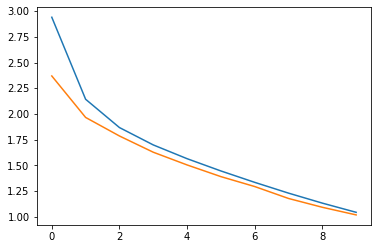

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
model.save_weights('bodas_sangre_LSTM_deep_no_dropout_last_epoch.hdf5')

In [0]:
# Para poder entrar con cualquier longitud
input_shape = (None, len(chars))
LSTM_units_1=200
LSTM_units_2=200

model = Sequential()
model.add(LSTM(LSTM_units_1, input_shape=input_shape, return_sequences=True, name='lstm_1',
                       dropout=dropout_p, recurrent_dropout=dropout_p))
#model.add(LSTM(LSTM_units_2, dropout=dropout_p, recurrent_dropout=dropout_p, name='lstm_2', return_sequences=True))
model.add(Dense(dense_units, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop')

In [0]:
model.load_weights('bodes_sangre_LSTM_deep_no_dropout.hdf5')

In [0]:
from RNN_utils import get_deep_rnn, chars_to_one_hot, sample

In [0]:
def get_predictions(input_text, pred_char_n = -1, verbose = True):
  X_test = chars_to_one_hot(input_text, chars, chars_to_indices, len(input_text))
  predictions = model.predict(X_test)
  probs_sorted_indexes = np.argsort(predictions[0][pred_char_n])[::-1] 
  if verbose:
    print(input_text[:pred_char_n+1])
    print([(indices_to_chars[i], predictions[0][pred_char_n][i]) for i in probs_sorted_indexes[:5]])  
  return indices_to_chars[probs_sorted_indexes[0]]

In [184]:
# input_text = "Estaba la novi"
# input_text = "Estaba el novi"
input_text = "los caballo"
# input_text = "el caballo"
get_predictions(input_text, pred_char_n=len(input_text)-1)

los caballo
[('s', 0.9060047), (' ', 0.027216077), ('r', 0.020261856), ('l', 0.0139919575), ('.', 0.0074446807)]


's'

In [193]:
t = 'NOVIO'
t = 'NOVIA'
for i in range(100):
  t = t + get_predictions(t,len(t)-1, verbose=False)
  #print(t)
print(t)

NOVIA: (Al modre la concina) La nevia a te vodo. Esten compo de la cabeza.)

NOVIA: (Alegre) ¿Y tu hijo?



In [210]:
input_text = 'El Novi'
X_test = chars_to_one_hot(input_text, chars, chars_to_indices, len(input_text))
p = model.predict(X_test)[0][-1]
for i in range(10):
  print(indices_to_chars[sample(p, 0.5)])

o
o
o
o
o
o
o
o
o
o


55